# EcoFOCIpy ADCP QC - 23KUP-1A

- mostly remove >200 cm/s flows in u/v


In [4]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [5]:
xdf = xa.load_dataset('23kup1a_0041m.nc')

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabe

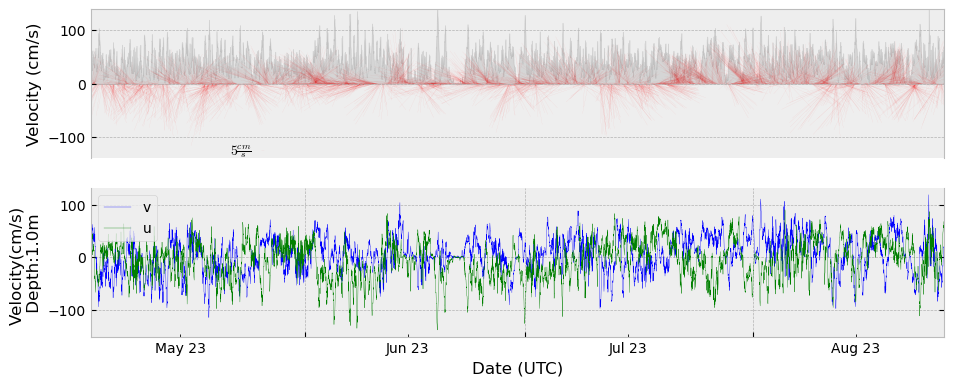

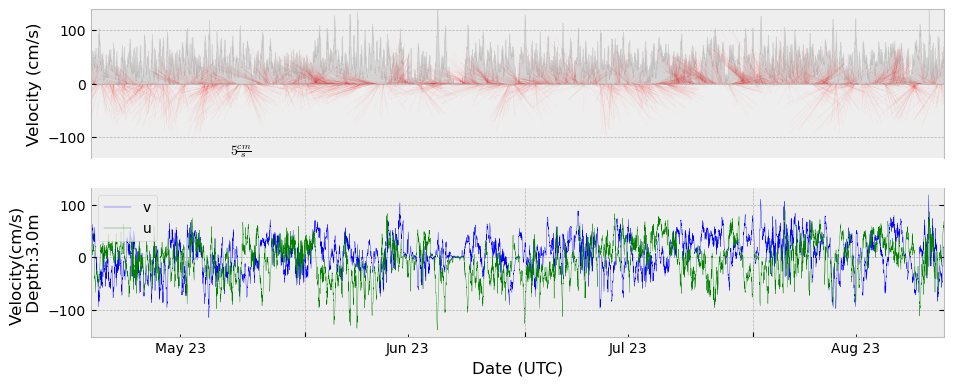

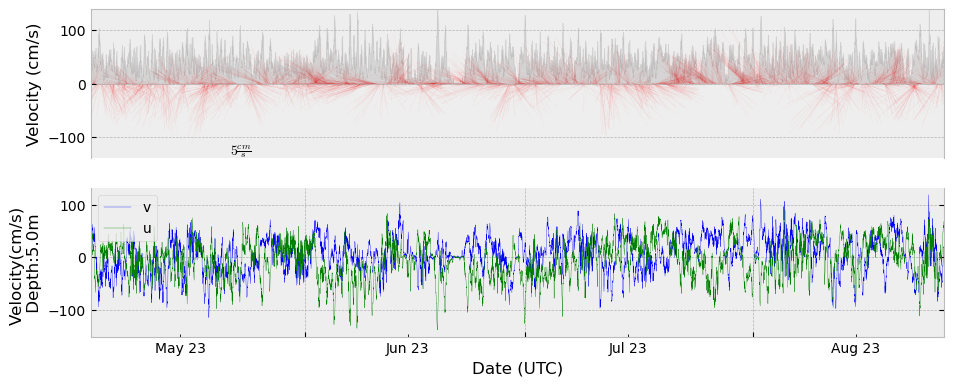

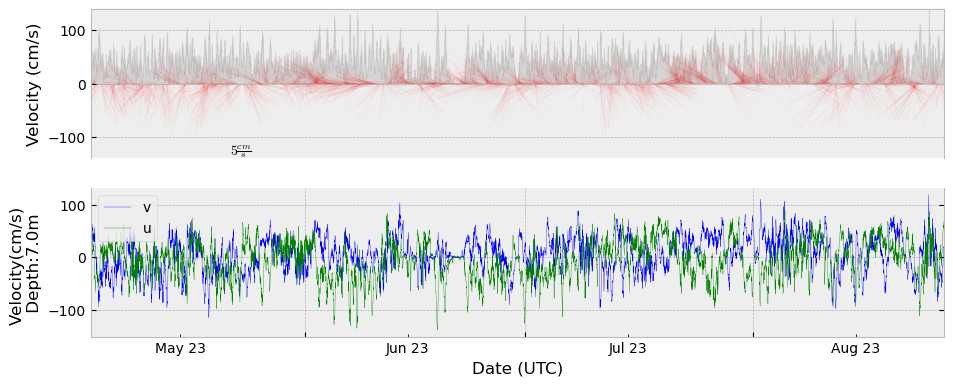

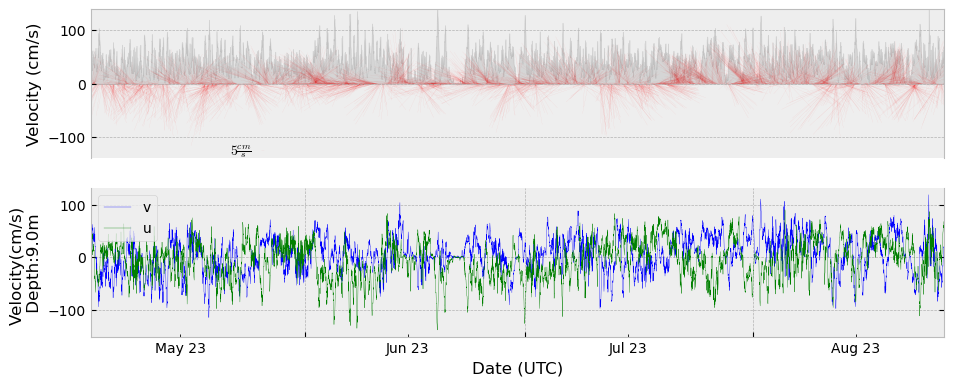

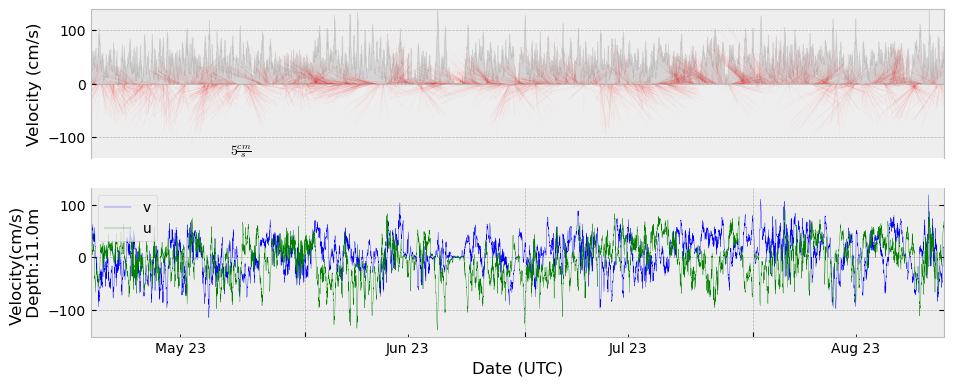

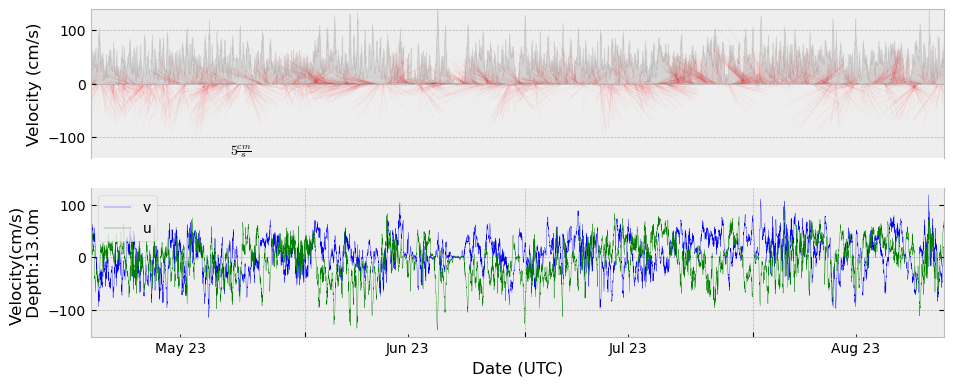

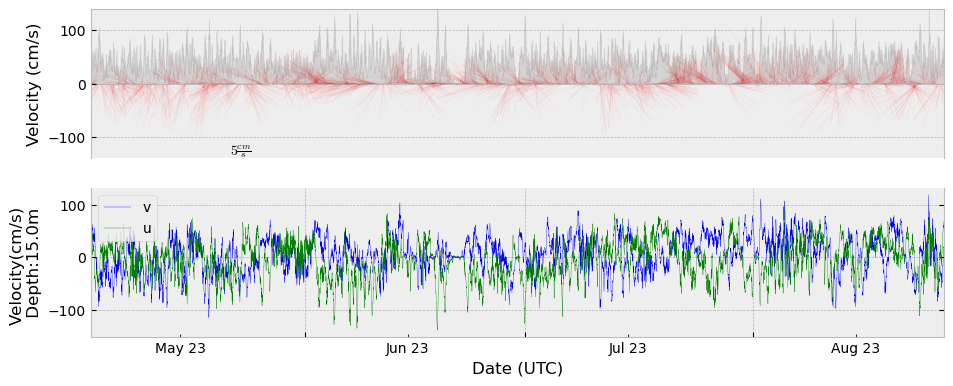

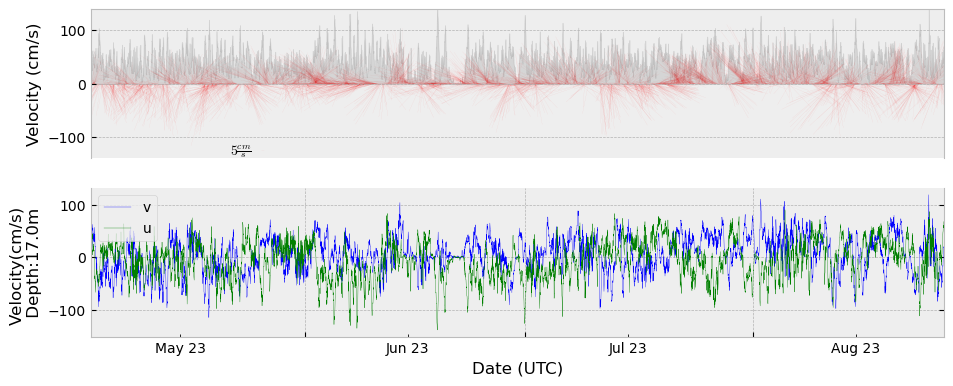

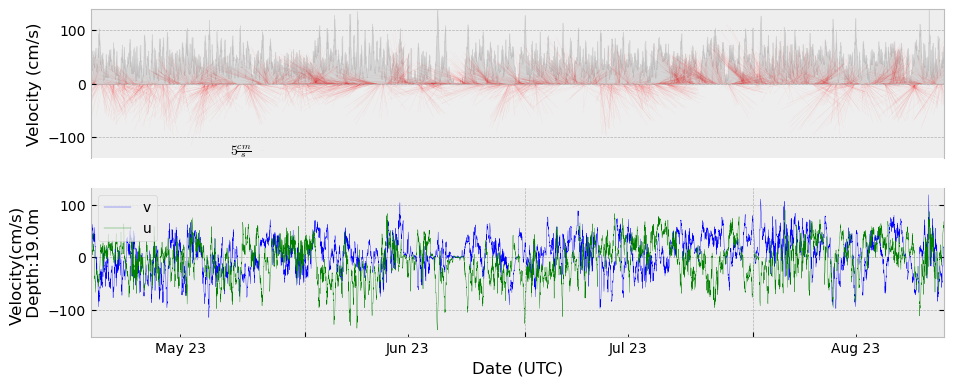

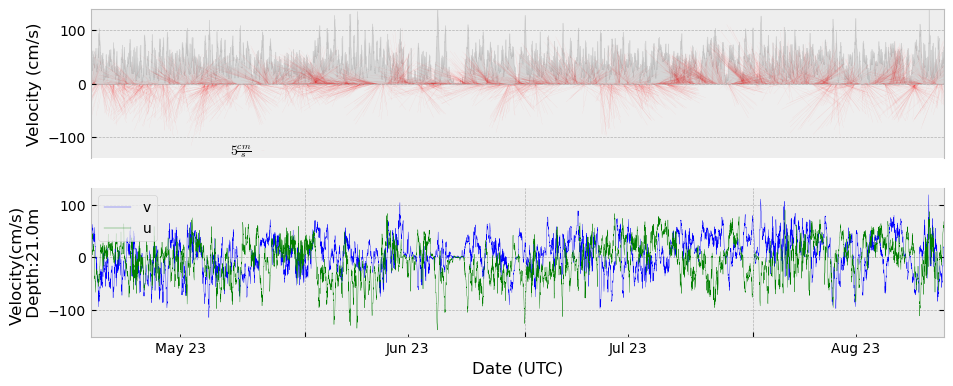

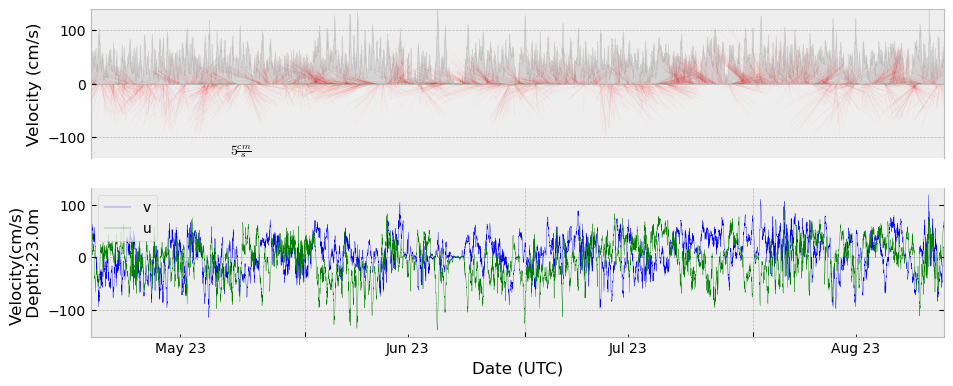

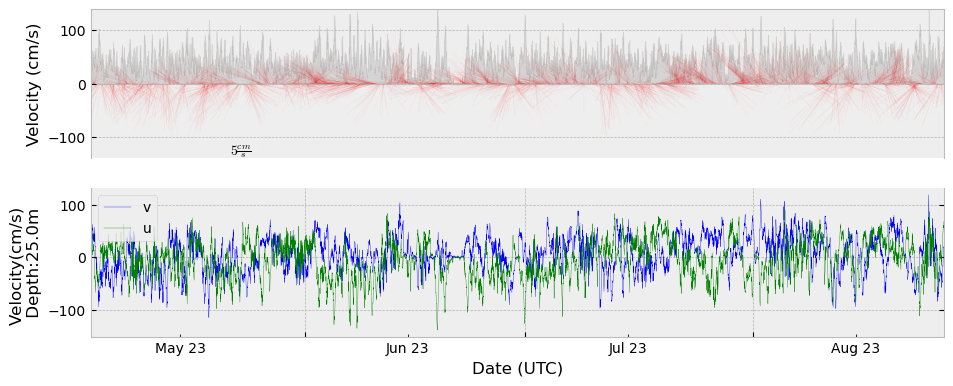

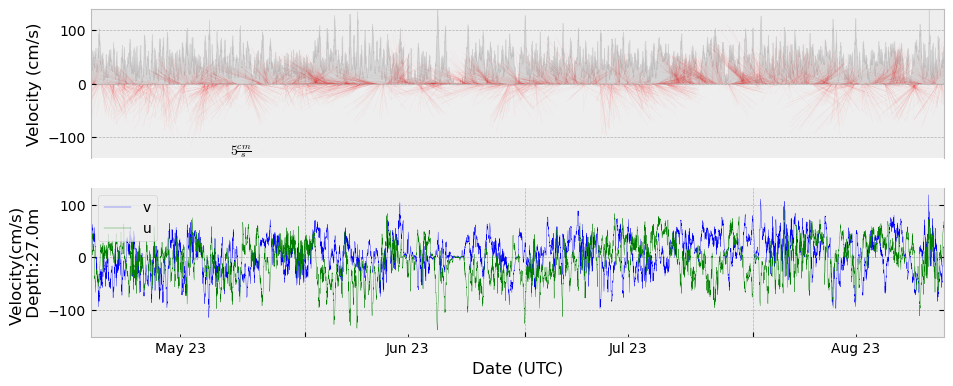

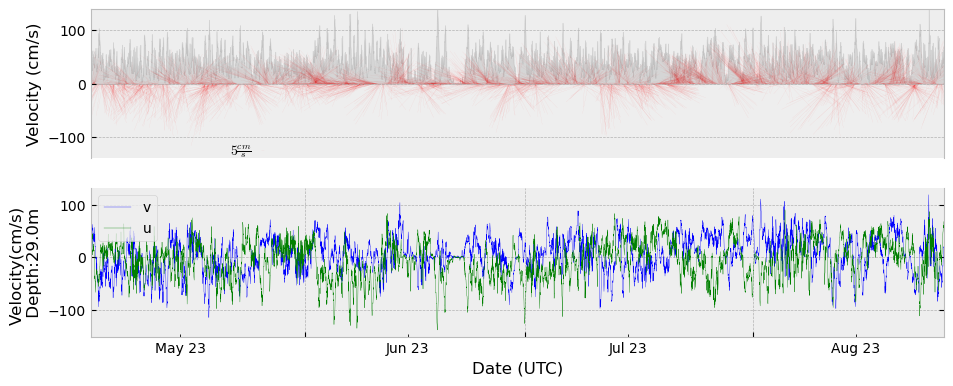

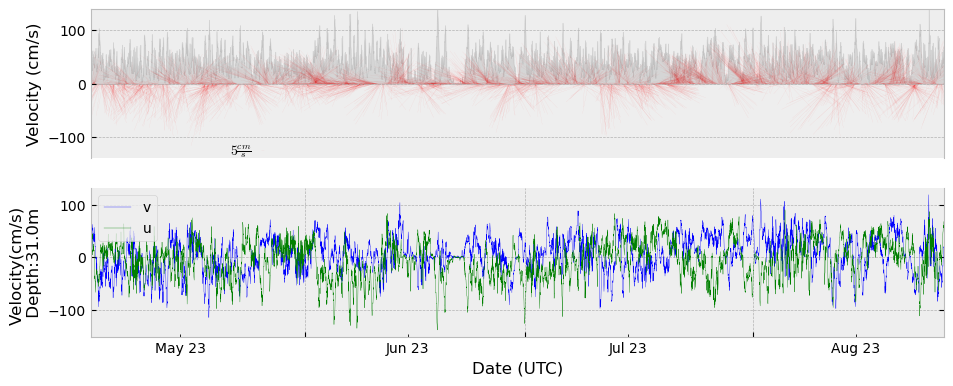

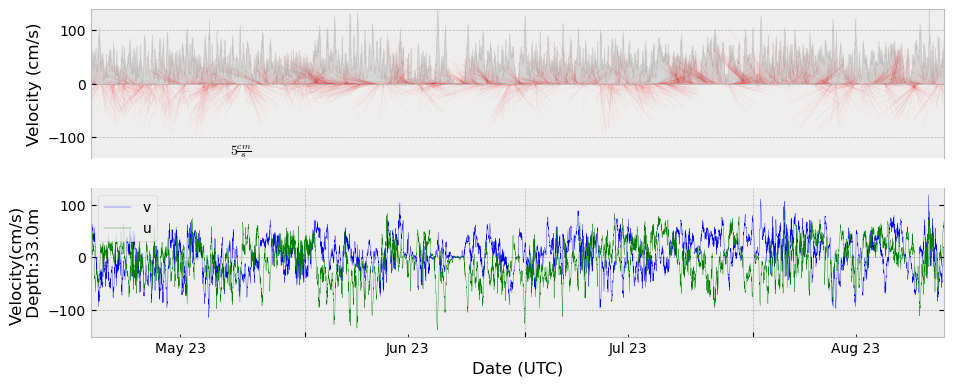

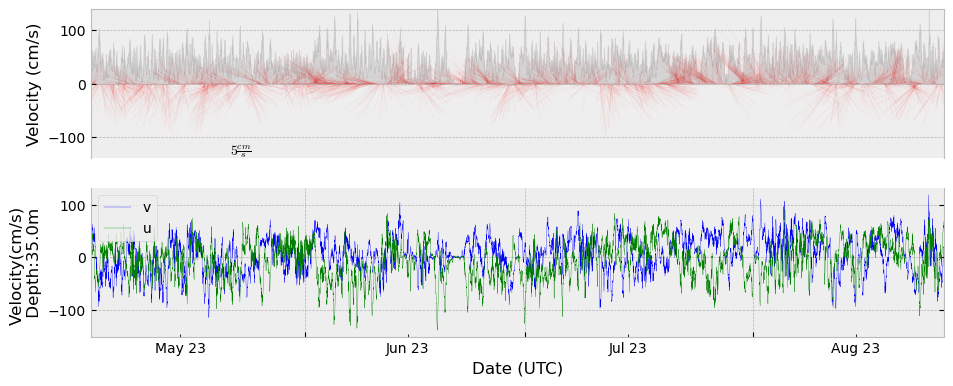

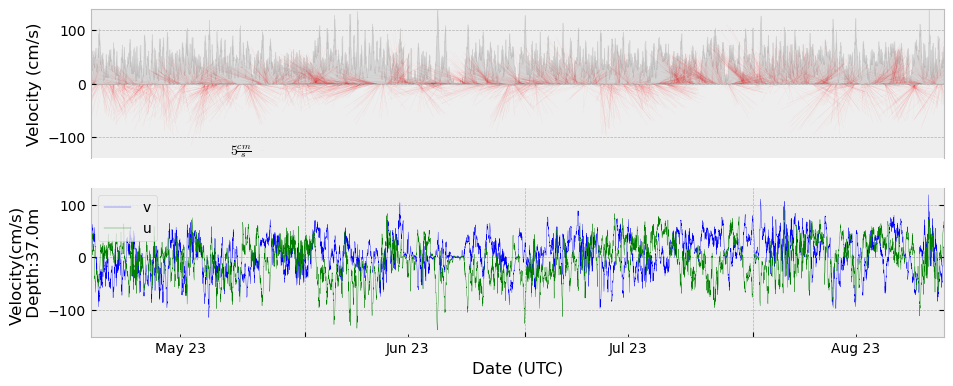

In [21]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=1,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=1,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

## BAsed on above plots - choose a relavant cutoff velocity (usually 100 or 500 cm/s)

In [7]:
xdf =xdf.where(xdf.u_curr_comp <=200,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 5574, depth: 24)
Coordinates:
  * time             (time) datetime64[ns] 2023-05-02T20:30:00 ... 2023-08-26...
  * depth            (depth) float64 -9.0 -7.0 -5.0 -3.0 ... 31.0 33.0 35.0 37.0
  * latitude         (latitude) float64 57.72
  * longitude        (longitude) float64 -163.7
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 24.69 ... 3.614
    v_curr_comp      (latitude, longitude, time, depth) float64 17.75 ... 0.4388
    w_curr_comp      (latitude, longitude, time, depth) float64 -4.7 ... -0.2
    w_curr_comp_err  (latitude, longitude, time, depth) float64 -7.9 ... -1.4
    agc1             (latitude, longitude, time, depth) float64 103.0 ... 105.0
    agc2             (latitude, longitude, time, depth) float64 103.0 ... 105.0
    agc3             (latitude, longitude, time, depth) float64 108.0 ... 110.0
    agc4             (latitude, longitude, time, depth) float64 102.0 ... 103.0
Attributes: (12/13)
    Latitude_DegMMddW:                      57 43.016 N
    Longitude_DegMMddN:                     163 43.155 W
    MooringID:                              23KUP-1A
    platform_deployment_date:               2023-05-02T20:28:00Z
    platform_deployment_cruise_name:        DY2306
    platform_recovery_date:                 2023-08-26T23:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             49.0
    date_created:                           2024-06-06T08:33:41Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [8]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

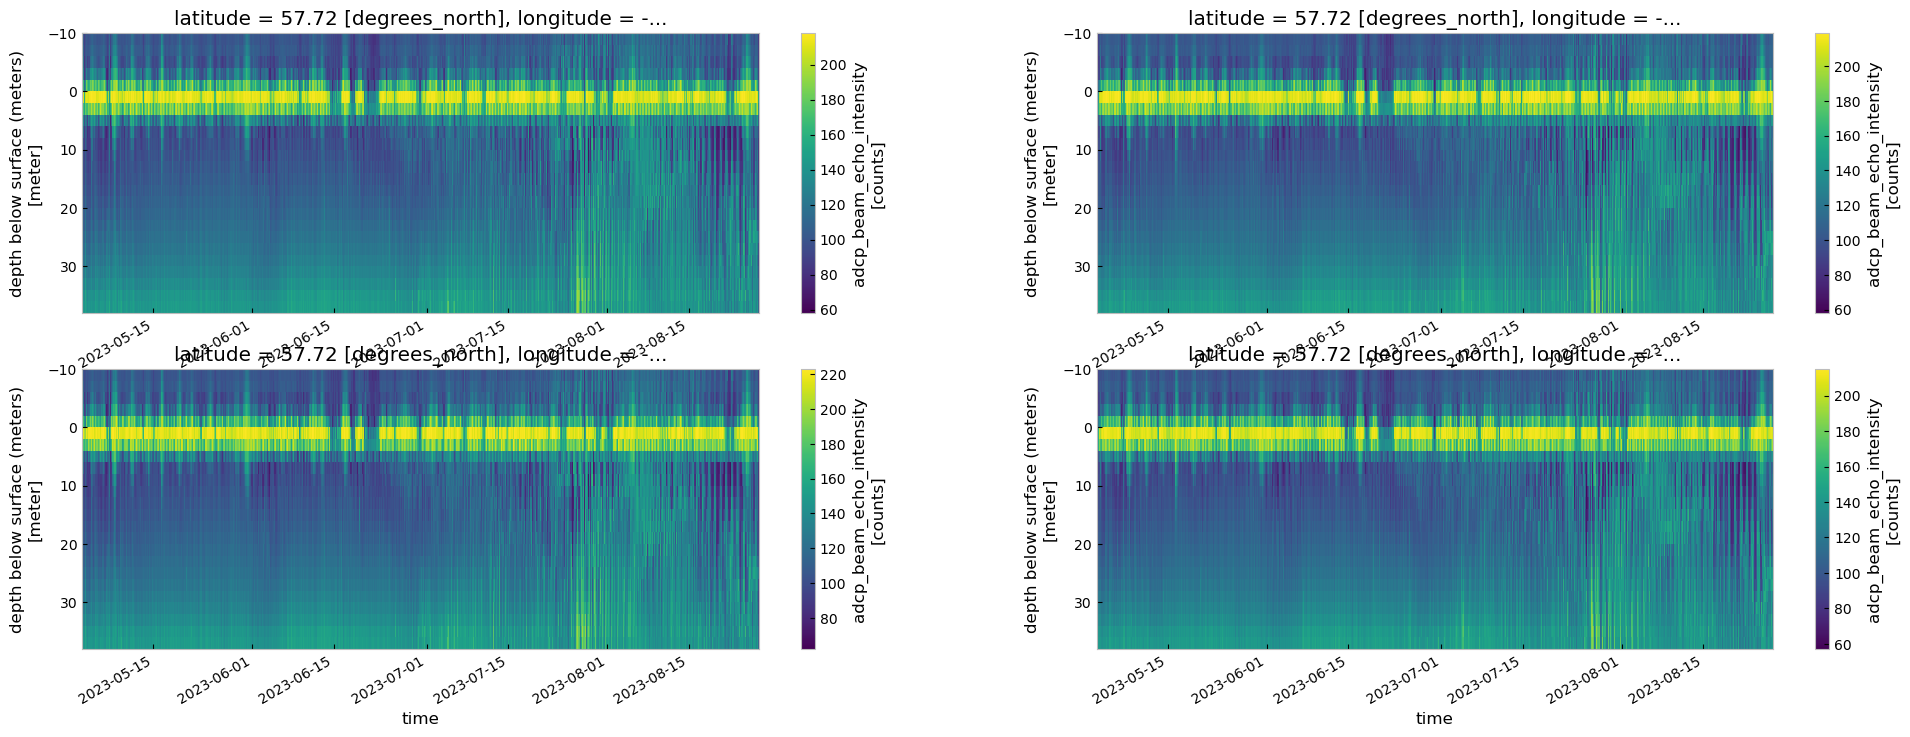

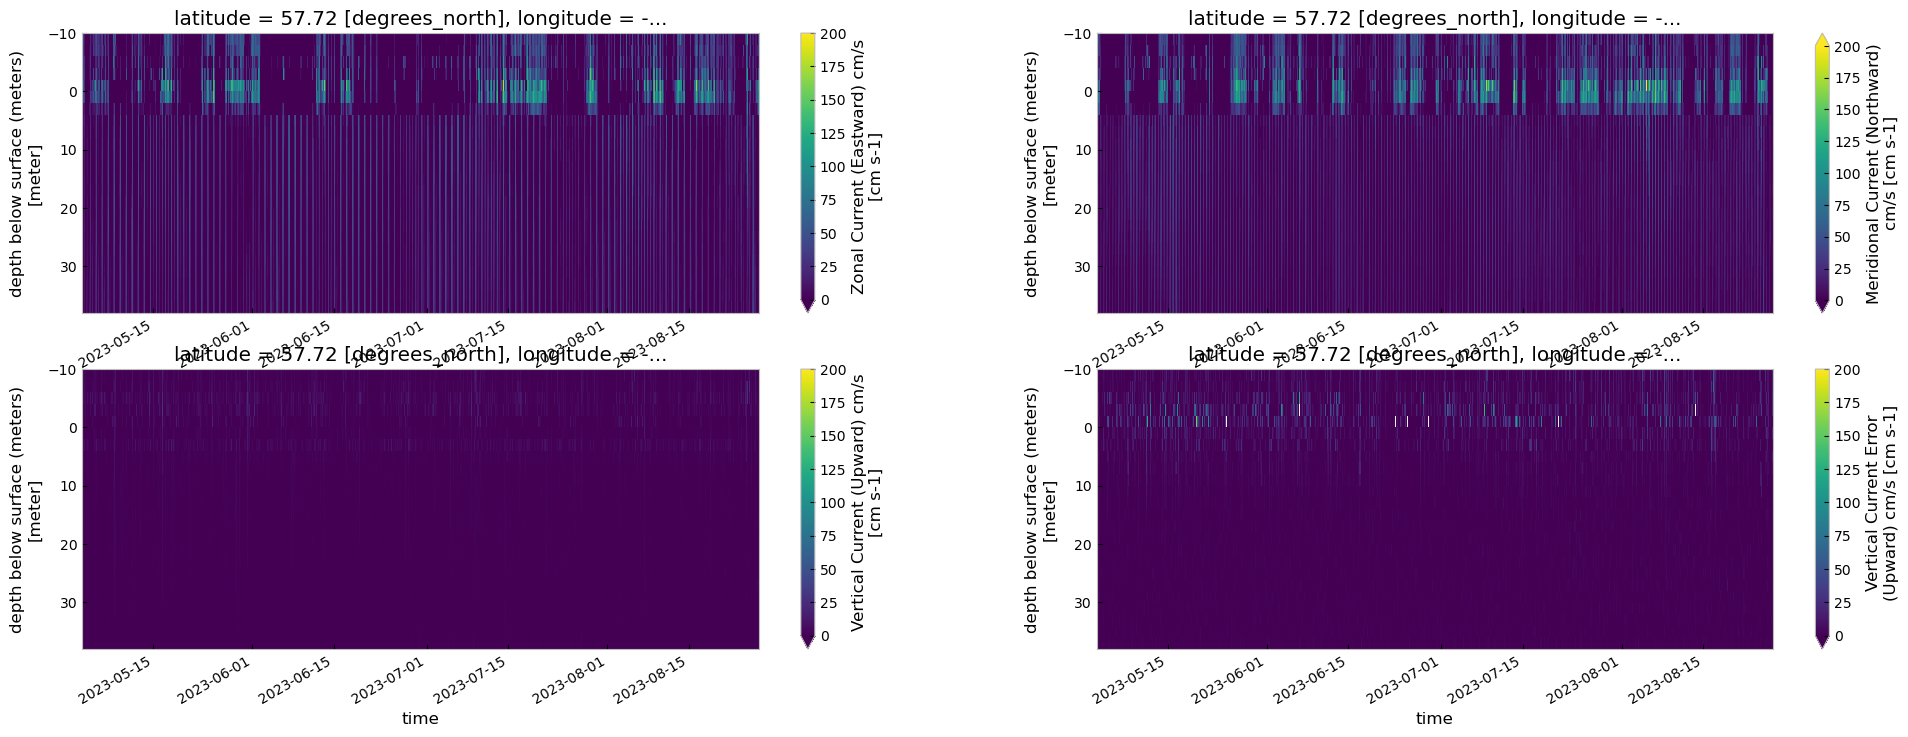

In [9]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [10]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >200cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >200cm/s'    

## Trim above surface (negative values)

In [11]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [13]:
ixdf.to_netcdf('23kup1a_0041m.trimmed.nc')

In [14]:
xdf = xa.load_dataset('23kup1a_0041m.trimmed.nc')

In [15]:
ixdf = xdf.interpolate_na(dim='time',use_coordinate=True,max_gap='2H')

In [16]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [35]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [17]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

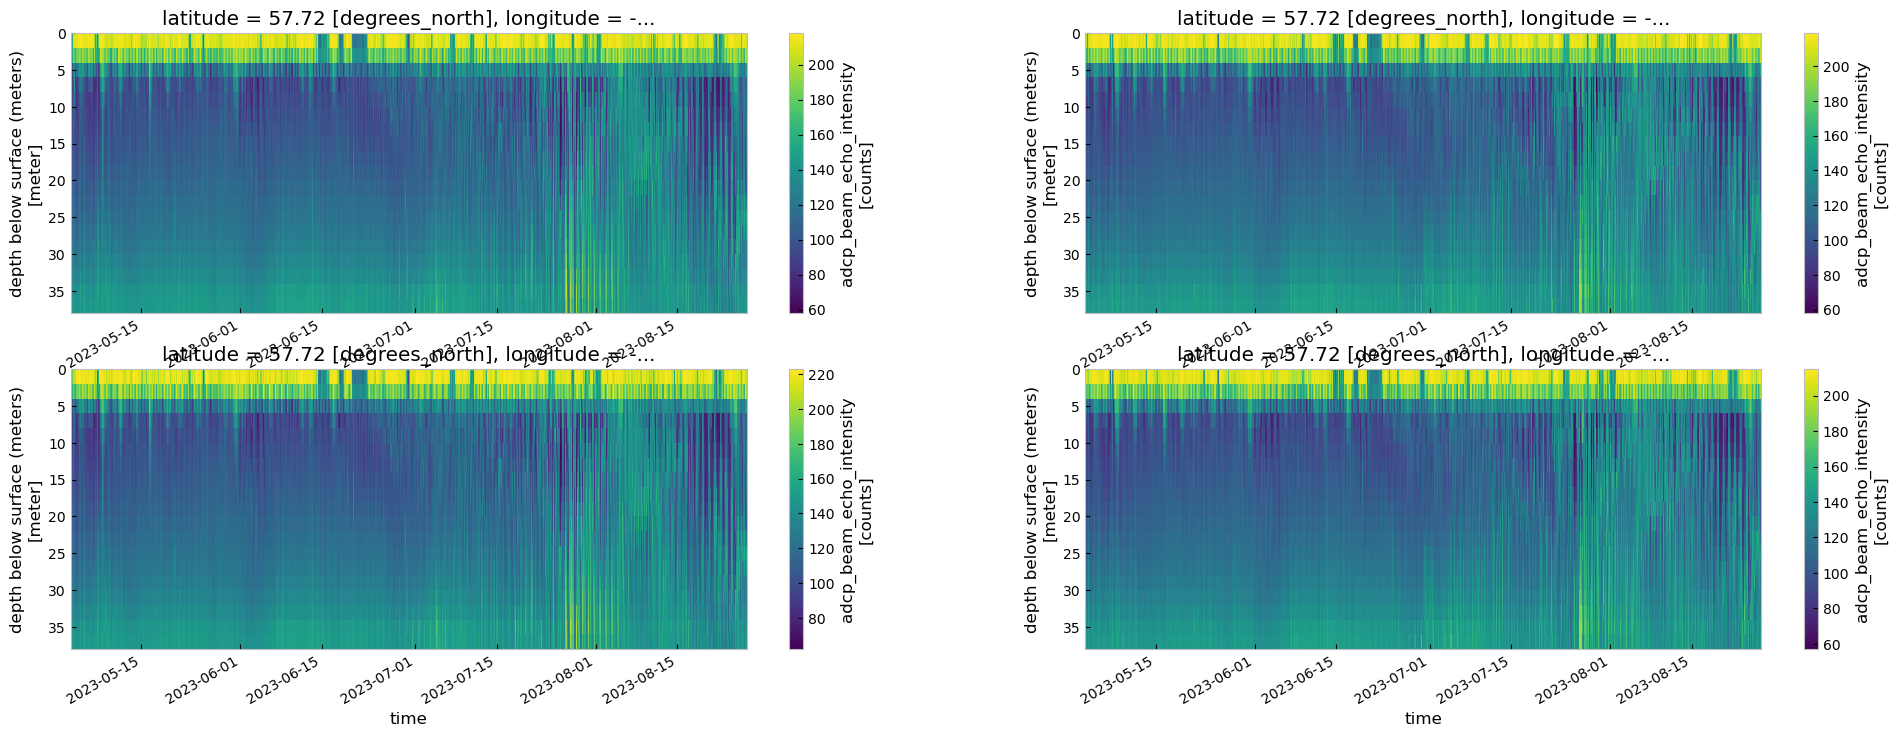

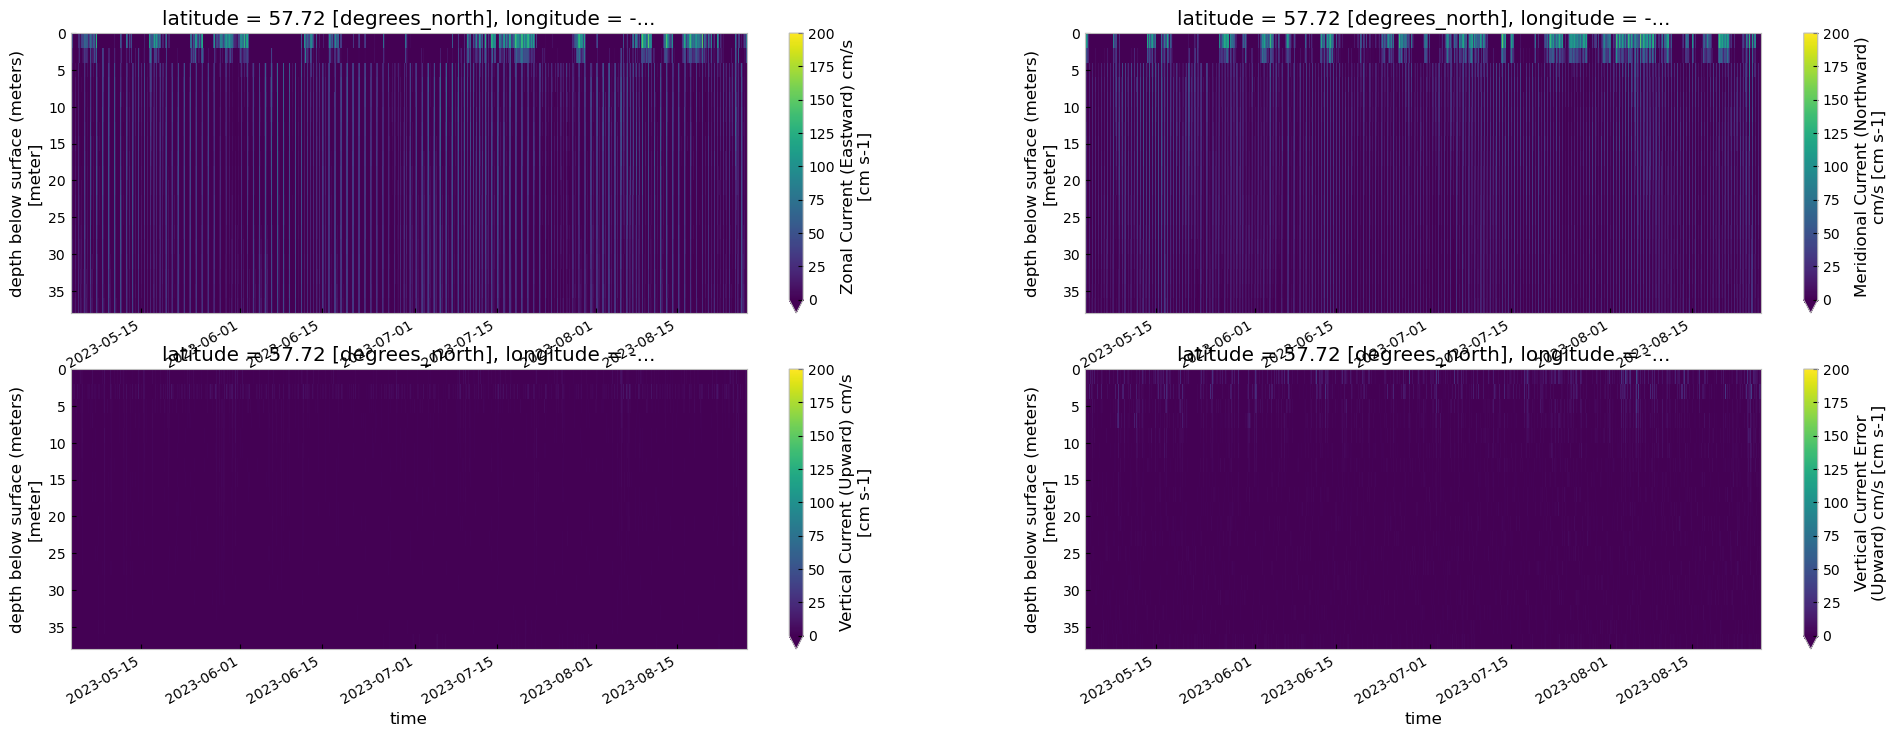

In [18]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [19]:
ixdf.to_netcdf('23kup1a_0041m.filtered.nc')